# Importing libraries

In [1]:
from IPython.utils import io
with io.capture_output() as captured:
    import spacy
    import re
    import os
    import pdfminer
    from pdf2docx import parse
    from gensim.utils import simple_preprocess
    from PyPDF2 import PdfReader
    # from utils.Detectron import Detectron
    from utils.API import API?
    from utils.PDFExtractor import PDFExtractor
    from utils.GraphPlotter import GraphPlotter
    from utils.TextProcessor import TextProcessor
    from utils.UploadFile import UploadFile
    from utils.ERExtractor import ERExtractor
    from utils.Miscellaneous import append_to_master_csv, extract_images_from_pdf, ext_tab_rel_para, extract_txt_from_img
    from utils.Para_table_image_extraction import get_table_image_info
    %matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Uploading file

In [2]:
UploadFile()

Running on local URL:  http://0.0.0.0:9000

To create a public link, set `share=True` in `launch()`.


PDF file '/private/var/folders/5h/pk7vxzxs3dz0wdvdvws7s48r0000gn/T/gradio/d61e68fb8c66def4748c51a8f6c42f9ae0085bcc/ClimateActionPlan.pdf' has been uploaded and saved to ./uploads/ClimateActionPlan.pdf
Selected model: en_core_web_sm


# Initilaizing few helper functions

In [3]:
baseURL = 'http://localhost:8000/app'

# File path
file_path1 = './uploads/file_name.txt'

PDF_PATH = ""
# Read the content of the file
with open(file_path1, 'r') as file:
    PDF_PATH = file.read()
    
# File path
file_path2 = './uploads/model.txt'

MODEL = ""
# Read the content of the file
with open(file_path2, 'r') as file:
    MODEL = file.read()
 
# convert pdf to docx
DOCX_PATH = '.'+PDF_PATH.split('.')[1]+'.docx'
parse(PDF_PATH, DOCX_PATH)

# Delete the file
try:
    os.remove(file_path1)
    os.remove(file_path2)
    
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

nlp = spacy.load(MODEL)
nlp.max_length = 1500000 #or any large value, as long as you don't run out of RAM

In [4]:
# detectron = Detectron(PDF_PATH)
pdf_extractor = PDFExtractor(PDF_PATH)
text_processor = TextProcessor(pdf_extractor.extract_sentences())
er_extractor = ERExtractor(MODEL)

# Storing images in folder

In [5]:
output_folder = "./extracted_data/"+PDF_PATH.split('/')[-1].split('.')[0] + '/images'
extract_images_from_pdf(PDF_PATH, output_folder)

# Extracting paras related to tables

In [6]:
paras = ext_tab_rel_para(PDF_PATH)

tesseract 5.3.3
 leptonica-1.83.1
  libgif 5.2.1 : libjpeg 8d (libjpeg-turbo 3.0.0) : libpng 1.6.40 : libtiff 4.6.0 : zlib 1.2.11 : libwebp 1.3.2 : libopenjp2 2.5.0
 Found NEON
 Found libarchive 3.7.2 zlib/1.2.11 liblzma/5.4.4 bz2lib/1.0.8 liblz4/1.9.4 libzstd/1.5.5
 Found libcurl/8.4.0 SecureTransport (LibreSSL/3.3.6) zlib/1.2.12 nghttp2/1.55.1
Matched Table Expressions: Table 2-1
Page Number:-  7
Paragraph:- Estimates of future energy use and GHG emissions in Blacksburg are based on projections from the The U.S. Energy Information Administration (EIA) Annual Energy Outlook 2013. Nationwide projections from that report were compared to US population projections from the 2010 census to determine current and projected per capita energy use and GHG emission estimates for 2013 – 2050. Current US per capita estimates were compared to current Blacksburg per capita energy use and GHG emissions data to determine the proportion by which the EIA projections needed to be scaled down for each sec

# Extracting text from images

In [7]:
extract_txt_from_img(PDF_PATH)

{}

# Extracting using Detectron2

In [8]:
# # Detecting
# detections = []
# pdf = PdfReader(PDF_PATH)
# for i in range(len(pdf.pages)):
#   detected_layout, page_image = detectron.detect_and_draw_boxes(i)
#   detections.append(detected_layout)

In [9]:
# # Extracting
# final_text = ""
# for i in range(len(pdf.pages)):
#     print('Page: ', i+1, '\n')
#     detectron.extract(detections[i],i)

# Finding Key - Value Pairs

In [10]:
key_value_pairs, tables = pdf_extractor.extract_key_value_pairs()

tesseract 5.3.3
 leptonica-1.83.1
  libgif 5.2.1 : libjpeg 8d (libjpeg-turbo 3.0.0) : libpng 1.6.40 : libtiff 4.6.0 : zlib 1.2.11 : libwebp 1.3.2 : libopenjp2 2.5.0
 Found NEON
 Found libarchive 3.7.2 zlib/1.2.11 liblzma/5.4.4 bz2lib/1.0.8 liblz4/1.9.4 libzstd/1.5.5
 Found libcurl/8.4.0 SecureTransport (LibreSSL/3.3.6) zlib/1.2.12 nghttp2/1.55.1
./uploads/ClimateActionPlan.xlsx


In [11]:
if tables:
    tables[0]

**Creating Data Frame for ploting graph**

In [12]:
if key_value_pairs:
    table_dtf = er_extractor.key_value_pair_er_extractor(key_value_pairs)

# Plotting graphs for key value pairs

In [13]:
# Plotting entity based graphs and saving them
if tables and not table_dtf.empty:
    key_val_plotter = GraphPlotter(table_dtf, baseURL)
    tb_entities = table_dtf['entity'].unique()
    for entity in tb_entities:
        # Define a regular expression pattern to match sentences with no English characters
        non_english_pattern = r'^[^A-Za-z]*$'
        if not re.search(non_english_pattern, entity):
            key_val_plotter.plot_entity_based_graphs(entity)

# Extracting text from page

In [14]:
txt = text_processor.replace_words_with_synonyms()
print(txt)

doc = nlp(txt)
lst_docs = [sent for sent in doc.sents]
print("Total Number of Sentences", len(lst_docs))

2 update and notes : the climate integrated plan technical report was developed between 2008 and 2011 in partnership with houston vt urban affairs and planning department the final climate reform plan was developed from the findings found in this report, but a numb proportion of noteworthy changes were made, particularly to the approach of dividing goals, objectives and strategies into “ community strategies ” and “ government strategies ” with guidance from the climate action plan working group, the goals, objectives and stra tegies were re - organized into three different segments : “ individual actions ”, “ let ’ s get started ” strategies which are intended for a shorter - term implementation horizon, and “ looking ahead ” strategies, which are planned for implementation farther in the f uture, perhaps over a 5 - 15 year period chapter 1 introduction climate change is one of the most pressing challenges of the 21st century the world ’ s foremost scientists have been predicting and 

# Extracting Metadata

In [15]:
pdf_extractor.extract_metadata()# Save it in a csv with name same as name of pdf

Source:  ./uploads/ClimateActionPlan.pdf
Number of pages:  7
Author:  Lesley Howard
Creator:  Microsoft® Office Word 2007
Creation Date:  D:20230511032043Z00'00'
ModDate:  D:20230511032043Z00'00'
Producer:  macOS Version 13.2.1 (Build 22D68) Quartz PDFContext
There are 8 types of fonts in the given pdf document
For font key:  G1
   Font Sub Type:  Type0
   Base Font:  AAAAAF+TimesNewRomanPS-ItalicMT
   Font Encoding:  Identity-H
For font key:  G2
   Font Sub Type:  Type0
   Base Font:  AAAAAG+TimesNewRomanPSMT
   Font Encoding:  Identity-H
For font key:  G3
   Font Sub Type:  Type0
   Base Font:  AAAAAH+SymbolMT
   Font Encoding:  Identity-H
For font key:  TT1
   Font Sub Type:  TrueType
   Base Font:  AAAAAB+TimesNewRomanPSMT
   Font Encoding:  MacRomanEncoding
For font key:  TT2
   Font Sub Type:  TrueType
   Base Font:  AAAAAC+TimesNewRomanPS-BoldMT
   Font Encoding:  MacRomanEncoding
For font key:  TT3
   Font Sub Type:  TrueType
   Base Font:  AAAAAD+TimesNewRomanPS-BoldMT
   Font

# Trying Topic Modelling

In [16]:
os.environ['TOKENIZERS_PARALLELISM']='true'
max_num_topics = 10
topic_model, corpus, id2word = text_processor.get_topics(max_num_topics)

Number of topics: 1, Perplexity: -6.5194212053642895
Number of topics: 2, Perplexity: -6.632426357603674
Number of topics: 3, Perplexity: -6.679227351774433
Number of topics: 4, Perplexity: -6.743139256398696
Number of topics: 5, Perplexity: -6.7186886467705085
Number of topics: 6, Perplexity: -6.7880807865347155
Number of topics: 7, Perplexity: -6.844225740394413
Number of topics: 8, Perplexity: -6.840125709885721
Number of topics: 9, Perplexity: -6.8613894815350625
Final model with 9 topics and perplexity value as -6.8613894815350625
[(0, '0.022*"years" + 0.022*"town" + 0.017*"energy" + 0.011*"gas" + 0.011*"consumption" + 0.011*"natural" + 0.011*"tob" + 0.011*"municipal" + 0.011*"tree" + 0.011*"chapter"'), (1, '0.014*"governments" + 0.012*"reduce" + 0.011*"ghg" + 0.011*"cap" + 0.010*"action" + 0.010*"emissions" + 0.009*"climate" + 0.009*"town" + 0.007*"virginia" + 0.007*"tech"'), (2, '0.023*"electricity" + 0.022*"public" + 0.018*"total" + 0.017*"state" + 0.012*"emissions" + 0.012*"te

In [17]:
text_processor.visualize_topics(topic_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.136147 -0.077589       1        1  20.798567
3      0.150516  0.076734       2        1  20.098379
6     -0.033623 -0.149061       3        1  12.797336
4     -0.071353  0.043345       4        1  11.498849
8     -0.049577 -0.040482       5        1  10.807240
0      0.003471  0.020211       6        1   6.704239
7     -0.047516  0.072773       7        1   6.344629
2     -0.086269  0.016899       8        1   6.332798
1     -0.001796  0.037169       9        1   4.617962, topic_info=            Term       Freq      Total Category  logprob  loglift
250      natural  11.000000  11.000000  Default  30.0000  30.0000
340  electricity   6.000000   6.000000  Default  29.0000  29.0000
154          gas  14.000000  14.000000  Default  28.0000  28.0000
212       energy  22.000000  22.000000  Default  27.0000  27.0000
2        climate  18.000000  18.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
309        staff   0.515034   3.158623   Topic9  -4.9181   1.2616
244     blacksbu   0.515030   2.673548   Topic9  -4.9181   1.4283
302      faculty   0.515023   3.215013   Topic9  -4.9181   1.2438
83       address   0.515005   2.183408   Topic9  -4.9181   1.6308
81         world   0.514933   3.049517   Topic9  -4.9183   1.2965

[511 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
674       7  0.851100      accounts
82        7  0.851140  accumulating
592       3  0.750690      achieved
221       3  0.750592     achieving
312       9  0.912945        across
...     ...       ...           ...
721       6  0.844015        yearly
417       6  0.590335         years
417       8  0.295168         years
446       5  0.780910          ymca
753       3  0.750508           zes

[607 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 7, 5, 9, 1, 8, 3, 2])

# Extracting entities and relations (ML approach)

In [18]:
# Create a set of stop words 
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [19]:
dtf = er_extractor.txt_er_extractor(txt)
dtf

,id,text,entity,relation,object
0,0,2 update and notes : the climate integrated pl...,s,get_started,strategies
1,0,2 update and notes : the climate integrated pl...,scientists,have_been_predicting,changes_issions
2,0,2 update and notes : the climate integrated pl...,scientists,documenting,changes_issions
3,0,2 update and notes : the climate integrated pl...,climate_change,can_span,boundaries
4,0,2 update and notes : the climate integrated pl...,world_leaders,have_sought,"to_es_tablish_,_with_limited_success_,_multipl..."
...,...,...,...,...,...
87,6,* baseline inventory updates : revised natural...,projections_estimates,are_based,3_vt_consumption_percentages_emissions_project...
88,6,* baseline inventory updates : revised natural...,projections,were_compared,3_vt_consumption_percentages_emissions_project...
89,6,* baseline inventory updates : revised natural...,estimates,were_compared,3_vt_consumption_percentages_emissions_project...
90,6,* baseline inventory updates : revised natural...,eia_projections_projections,were_multiplied,blacksburg_population_projections


# Removing stopwords from the entities and creating a list of main topic words

In [20]:
# topic_words, word_scores, topic_nums = topic_model.get_topics()
topic_words = set()
for topic in topic_model.print_topics():
    for word in topic[1].split(' + '):
        topic_words.add(word.split('*')[1][1:-1])
        
tmp = dtf['entity'].value_counts().to_dict()
# print(topic_words)
print(tmp)
# Function to remove stopwords from a list of words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
        
filtered_words = []
for word in remove_stopwords(list(tmp.keys())):
    filtered_words.extend(word)
    
# Remove the stop words and creating dict
entity_dict = {}
for word in filtered_words:
    if word in tmp.keys():
        entity_dict[word] = tmp[word]

topic_words = list(topic_words)
# print(topic_words)
# print(entity_dict)

{'t_he_town': 6, 'governments': 6, 'that': 6, 'climate_planning_process_town_council': 5, 'forum': 5, 'units': 3, 'which': 3, 'town': 3, 'building_efficiencies': 3, 'gas_fuels_fuel_oil_propane_wood': 2, 'mayors': 2, 'town_council': 2, 'beauty_pride_leadership_population': 2, 'blacksburg': 2, 'scientists': 2, 'virginia_tech': 2, 'baseline_inventory': 2, 'virginia_virginia_tech': 1, 'focus_retrofitting': 1, 'residents': 1, 's': 1, 'coal': 1, 'blacksburg_community': 1, 'this': 1, 'uap': 1, 'baseline_inventory_updates_consumption_figures': 1, 'gas_provider': 1, 'details': 1, 'projections_estimates': 1, 'projections': 1, 'estimates': 1, 'eia_projections_projections': 1, 'force_sub_committee': 1, 'event': 1, 'public': 1, 'task': 1, 'climate_change': 1, 'world_leaders': 1, 'agreement': 1, 'towns_cities': 1, 'climate_action_plan': 1, 'presence': 1, 'students': 1, 'town_staff_officials_vt_faculty_students_administrators_citizens_businesses_organizations': 1, 'task_force': 1, 'cap': 1, 'citizens

# Ploting KG for topic words and other entites

Saved RDF graph for town in output/town.rdf


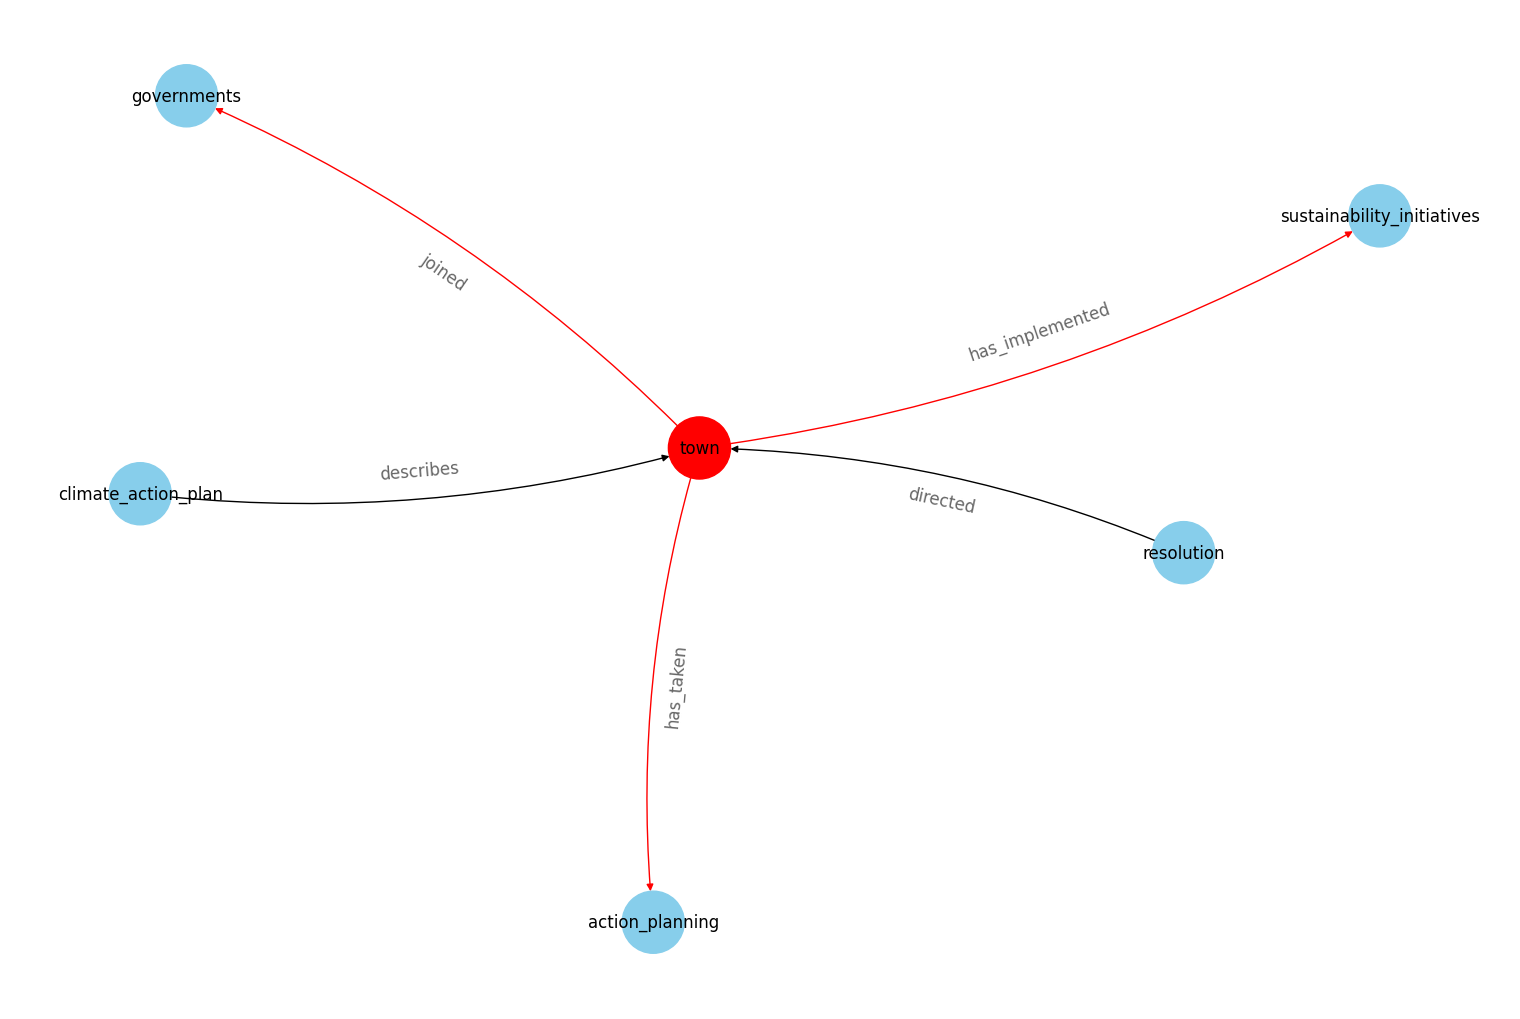

Saved RDF graph for governments in output/governments.rdf


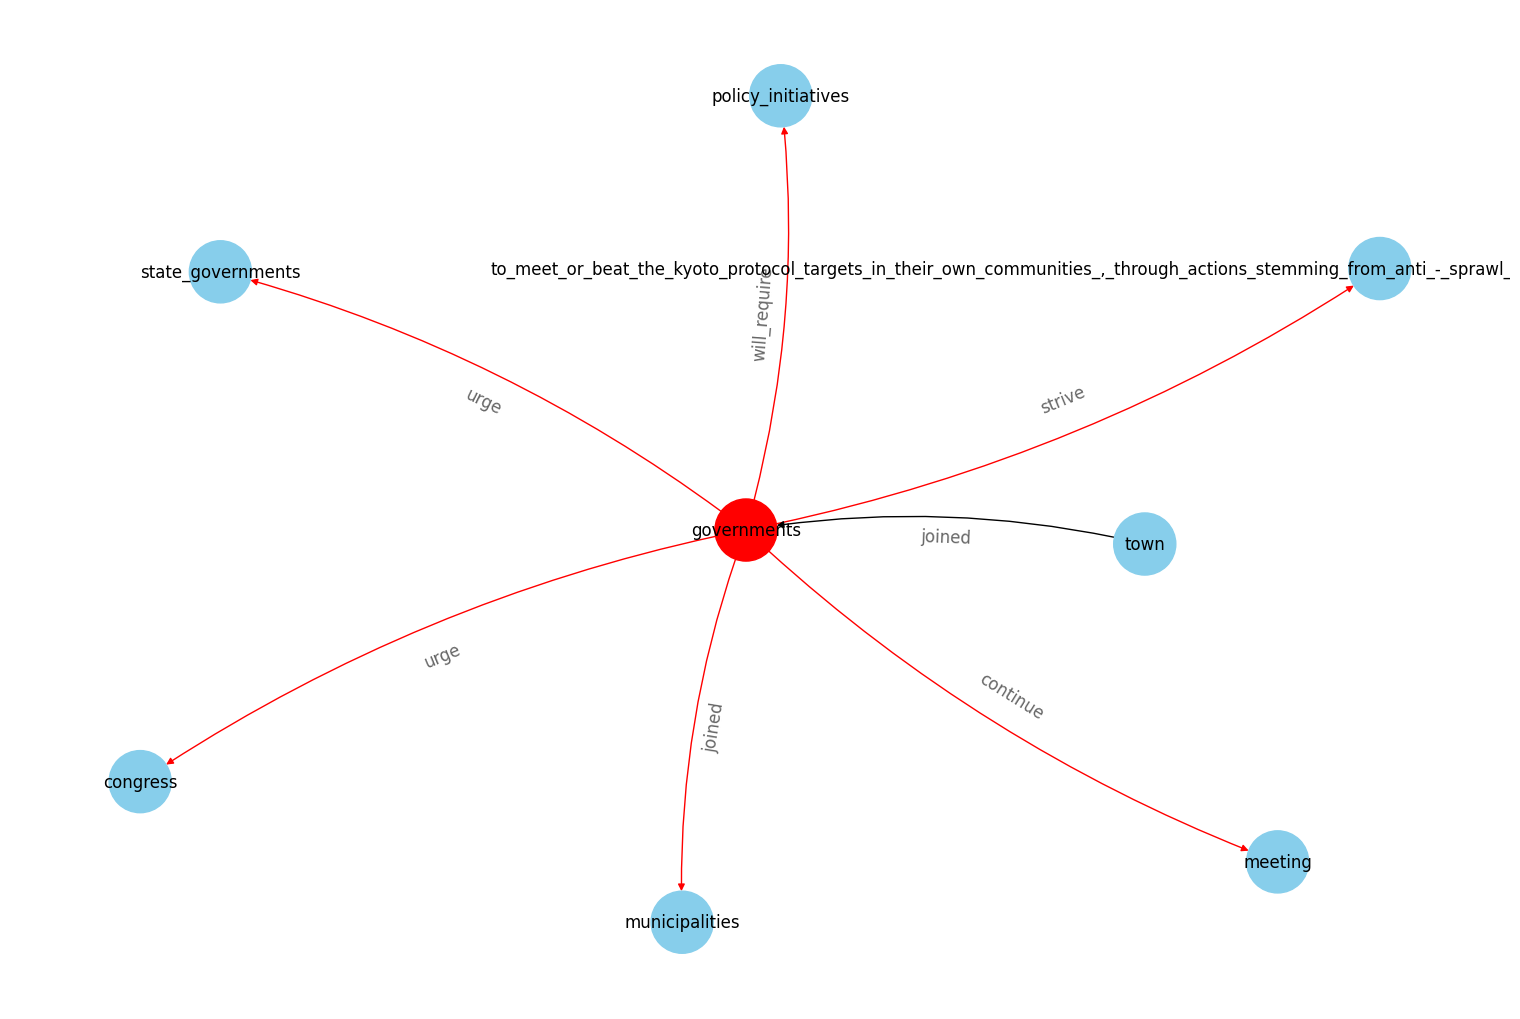

Saved RDF graph for blacksburg in output/blacksburg.rdf


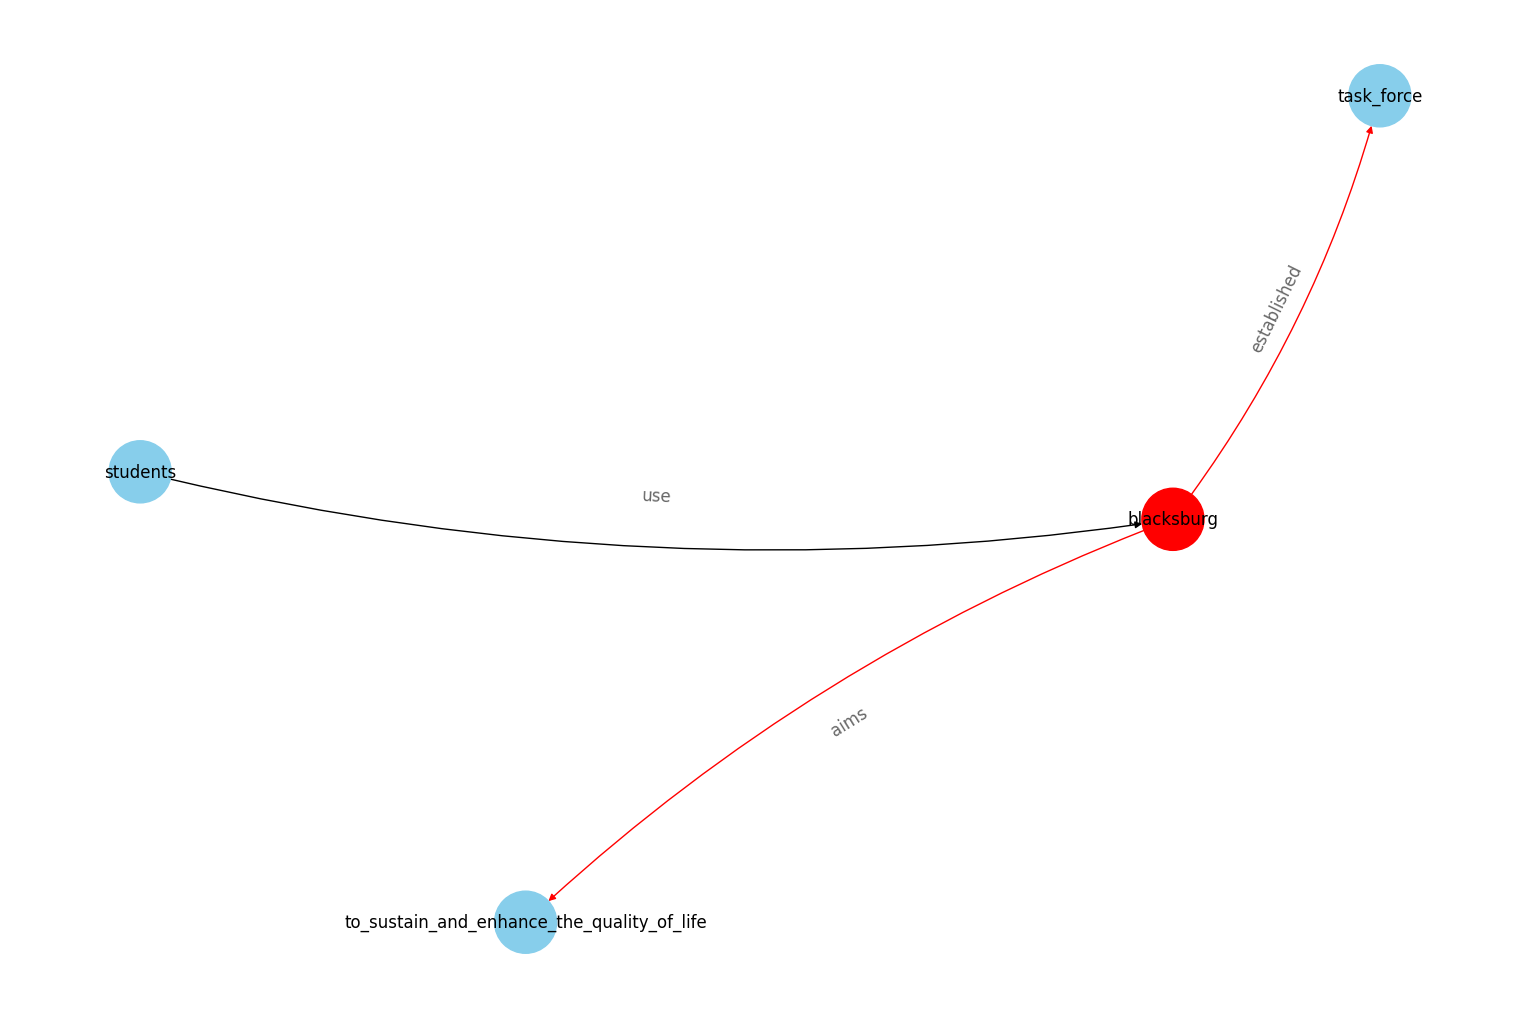

Saved RDF graph for t_he_town in output/t_he_town.rdf


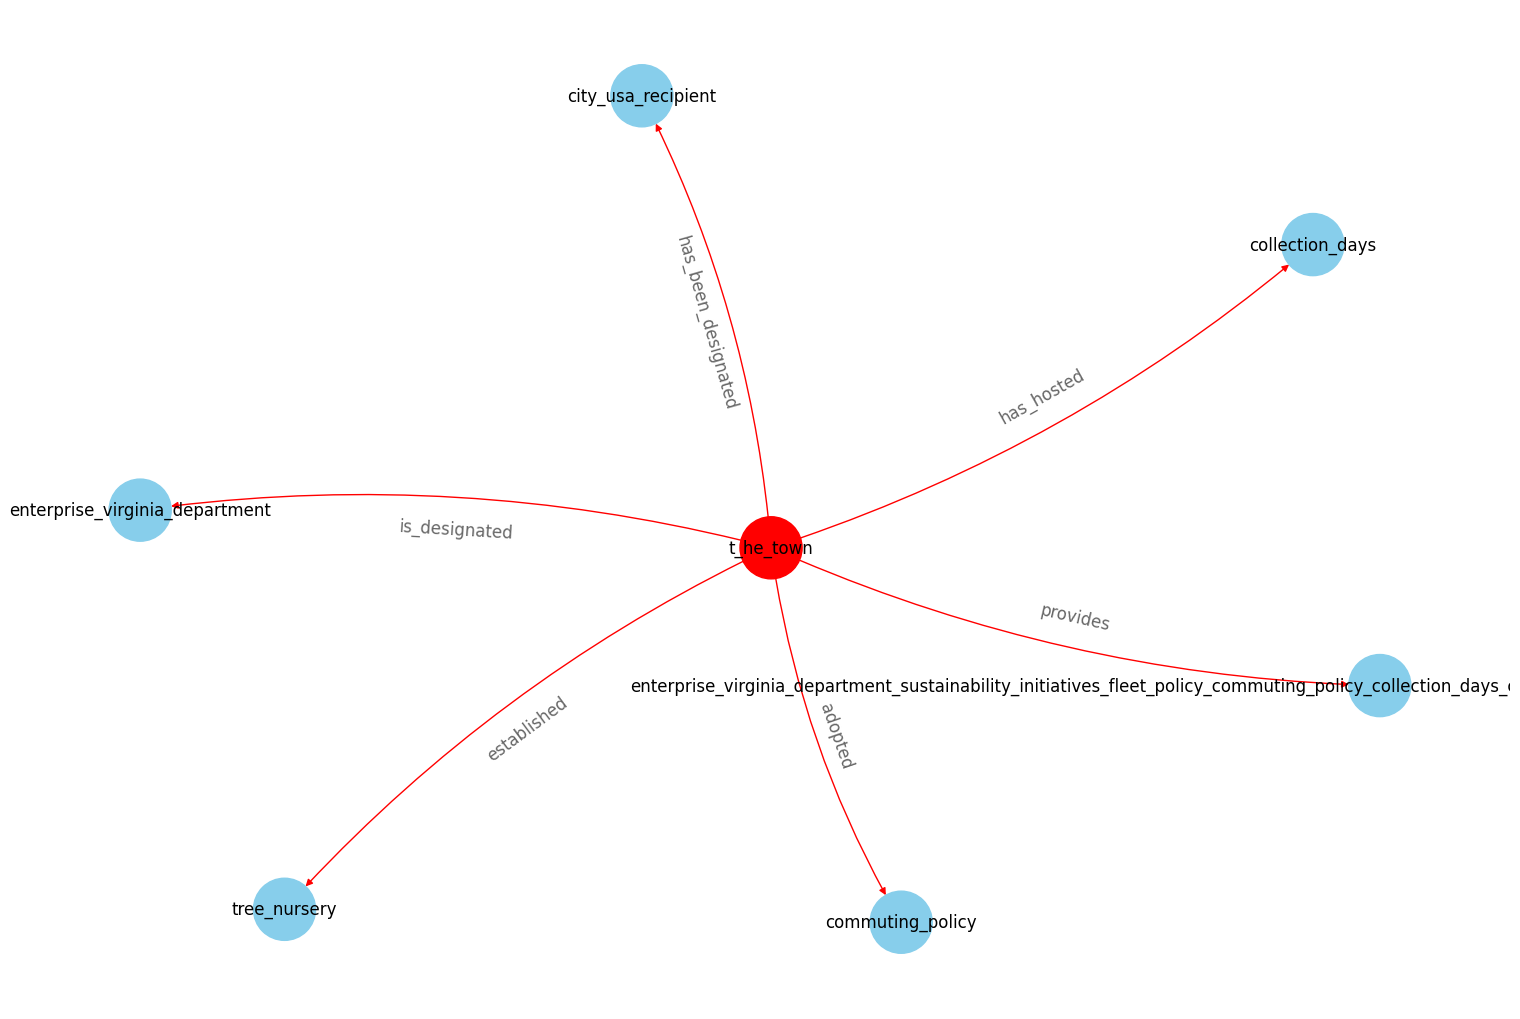

Saved RDF graph for forum in output/forum.rdf


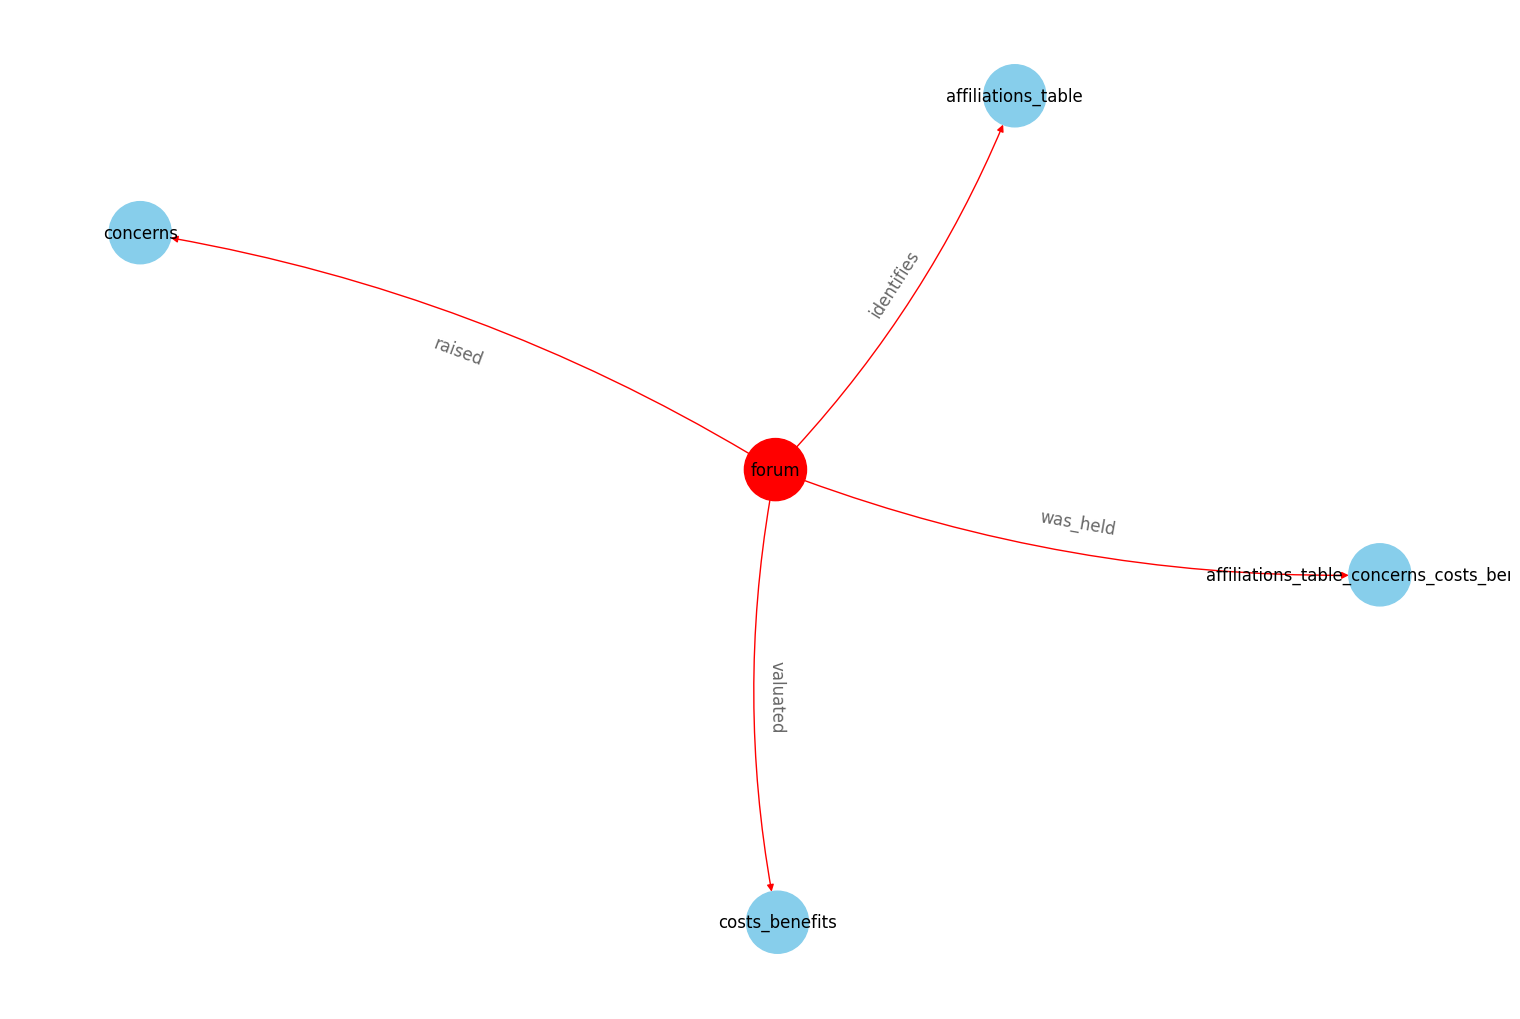

In [21]:
# Plotting topic based graphs and saving them
graph_plotter = GraphPlotter(dtf, baseURL)
graph_plotter.plot_topic_based_graphs(topic_words, entity_dict,5)

# Noting in master csv

In [22]:
append_to_master_csv(PDF_PATH)